### Nama: Huffaz Muhammad Abdurrofi Baith

### ANALISIS LUKISAN GAYA EKSPRESIONISME DENGAN GAYA REALISME MENGGUNAKAN IMAGE PROCESSING

### Import Modul

In [1]:
import numpy as np
from skimage import data, img_as_float, img_as_ubyte, exposure, io, color
from skimage.io import imread
from skimage.exposure import cumulative_distribution
from skimage.restoration import denoise_bilateral,denoise_nl_means,estimate_sigma
from skimage.metrics import peak_signal_noise_ratio
from skimage.util import random_noise
from skimage.color import rgb2gray
from PIL import Image, ImageEnhance, ImageFilter
import matplotlib.pylab as pylab
from skimage import filters
from scipy import ndimage, misc, signal

In [2]:
def plot_image(image, title):
    pylab.imshow(image), pylab.title(title, size=20), pylab.axis('off')

### Gambar Asli

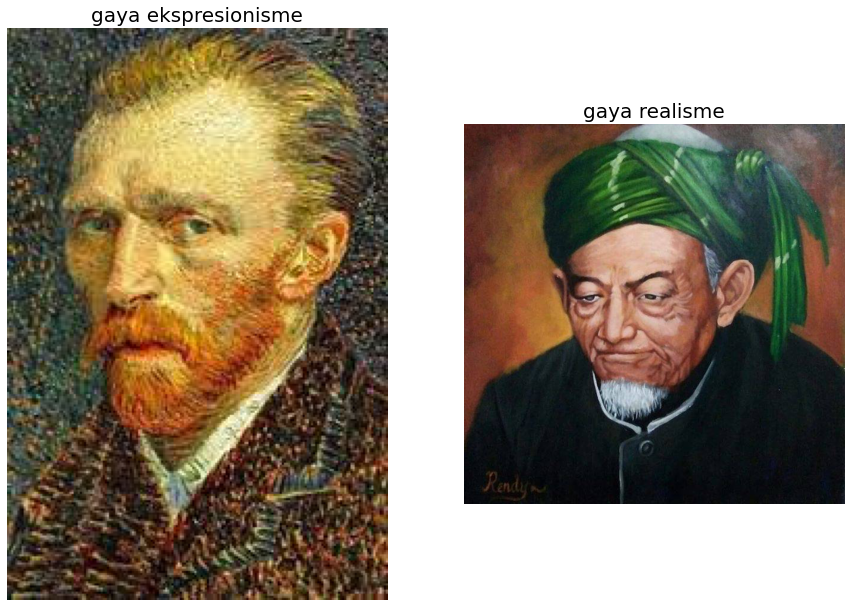

In [3]:
pylab.figure(figsize=(15,18))
im1 = Image.open('ekspresionisme.jpg')
im2 = Image.open('realisme.jpg')
pylab.subplot(1,2,1)
plot_image(im1,'gaya ekspresionisme')
pylab.subplot(1,2,2)
plot_image(im2,'gaya realisme')
pylab.show()

### Histogram RGB

In [4]:
def plot_hist(r, g, b, title=''):
    r, g, b = img_as_ubyte(r), img_as_ubyte(g), img_as_ubyte(b)
    pylab.hist(np.array(r).ravel(), bins=256, range=(0, 256), color='r',alpha=0.5)
    pylab.hist(np.array(g).ravel(), bins=256, range=(0, 256), color='g',alpha=0.5)
    pylab.hist(np.array(b).ravel(), bins=256, range=(0, 256), color='b',alpha=0.5)
    pylab.xlabel('pixel value', size=20), pylab.ylabel('frequency',size=20)
    pylab.title(title, size=20)

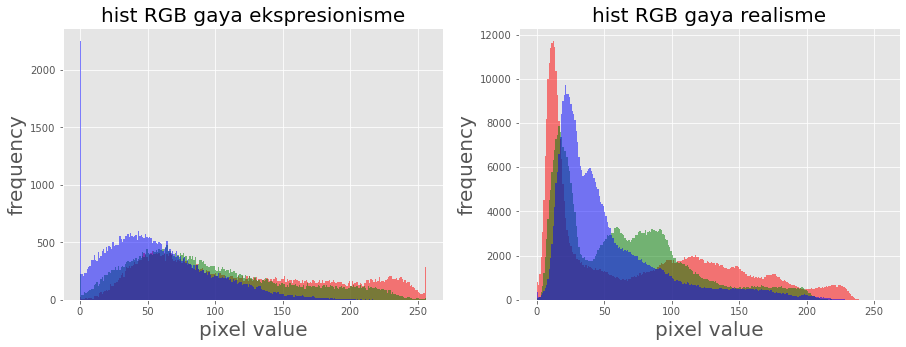

In [5]:
im_r1, im_g1, im_b1 = im1.split()
im_r2, im_g2, im_b2 = im2.split()
pylab.style.use('ggplot')
pylab.figure(figsize=(15,5))
pylab.subplot(121), plot_hist(im_r1, im_g1, im_b1,'hist RGB gaya ekspresionisme')
pylab.subplot(122), plot_hist(im_r2, im_g2, im_b2,'hist RGB gaya realisme')
pylab.show()

### Edge Detection menggunakan Filter Sobel

In [6]:
def edge_detection(im):
    gambar = rgb2gray(imread(im))
    pylab.gray()
    pylab.figure(figsize=(20,18))
    pylab.subplot(1,2,1)
    plot_image(gambar, 'Original')
    pylab.subplot(1,2,2)
    edges = filters.sobel(gambar)
    plot_image(edges, 'Filter Sobel')
    pylab.subplots_adjust(wspace=0.1, hspace=0.1)
    pylab.show()

<Figure size 432x288 with 0 Axes>

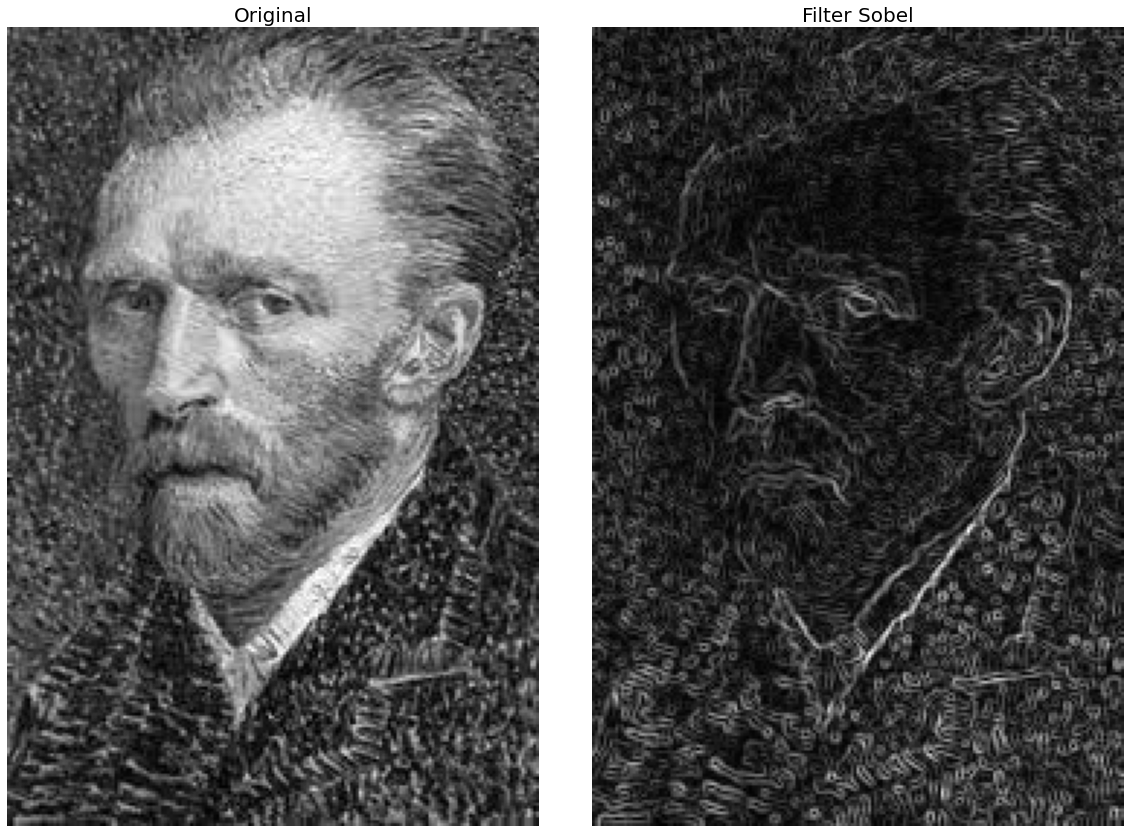

<Figure size 432x288 with 0 Axes>

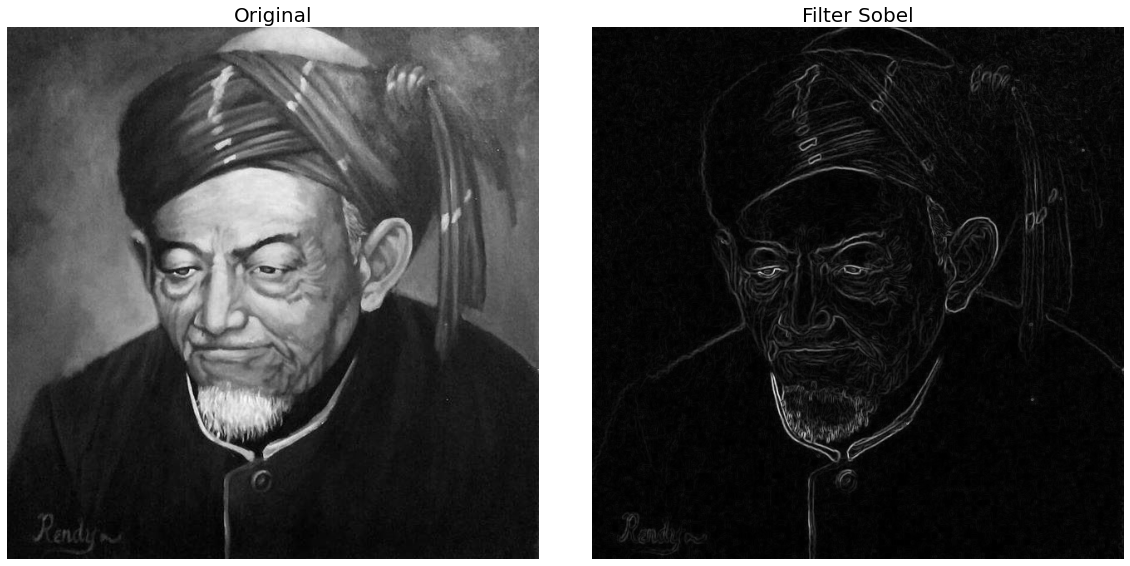

In [7]:
edge_detection(im='ekspresionisme.jpg')
edge_detection(im='realisme.jpg')

### Threshold

In [8]:
def threshold(im):
    im = im.convert('L')
    pylab.hist(np.array(im).ravel(), bins=256, range=(0, 256), color='g')
    pylab.xlabel('Pixel values'), pylab.ylabel('Frequency'),
    pylab.title('Histogram of pixel values')
    pylab.show()
    pylab.figure(figsize=(12,18))
    pylab.gray()
    pylab.subplot(221), plot_image(im, 'original image'), pylab.axis('off')
    th = [0, 50, 100, 150, 200]
    for i in range(2, 5):
        im1 = im.point(lambda x: x > th[i])
        pylab.subplot(2,2,i), plot_image(im1, 'binary image with threshold=' +str(th[i]))
    pylab.show()


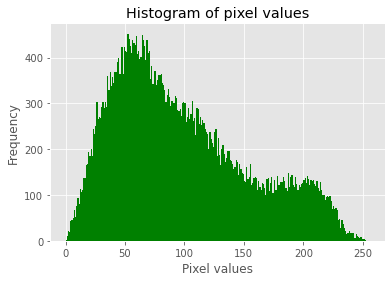

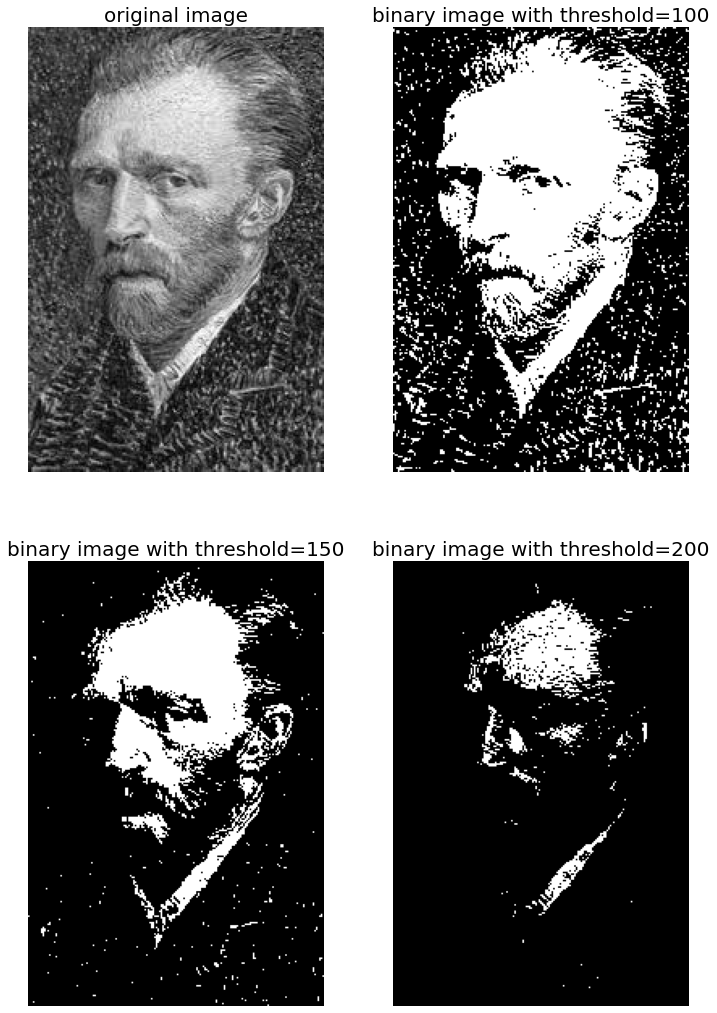

In [9]:
threshold(im1)

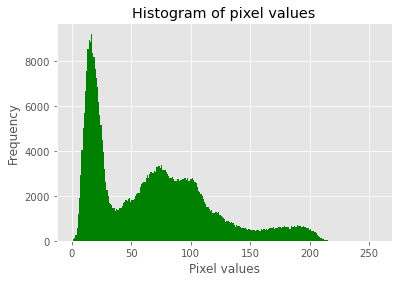

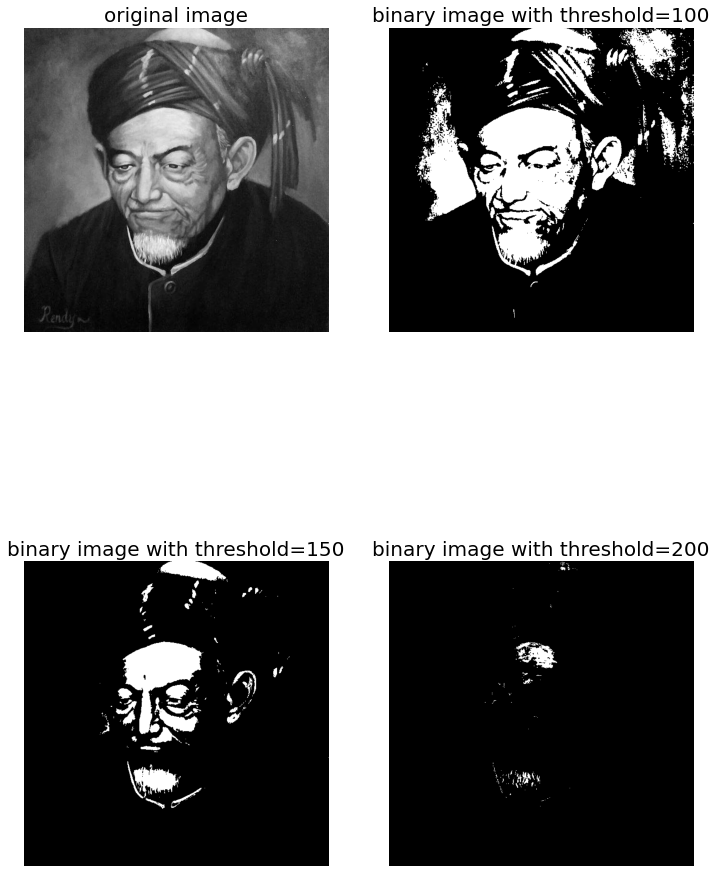

In [10]:
threshold(im2)

### Canny Edge Detector

In [11]:
from skimage.feature import canny
def Canny(gambar):
    im = rgb2gray(imread(gambar))
    im = ndimage.gaussian_filter(im, 4)
    im += 0.05 * np.random.random(im.shape)
    edges1 = canny(im)
    edges2 = canny(im, sigma=3)
    fig, (axes1, axes2, axes3) = pylab.subplots(nrows=1, ncols=3, figsize=(30,12), sharex=True, sharey=True)
    axes1.imshow(im, cmap=pylab.cm.gray), axes1.axis('off'),axes1.set_title('noisy image', fontsize=50)
    axes2.imshow(edges1, cmap=pylab.cm.gray), axes2.axis('off')
    axes2.set_title('Canny filter, $\sigma=1$', fontsize=50)
    axes3.imshow(edges2, cmap=pylab.cm.gray), axes3.axis('off')
    axes3.set_title('Canny filter, $\sigma=3$', fontsize=50)
    fig.tight_layout()
    pylab.show()

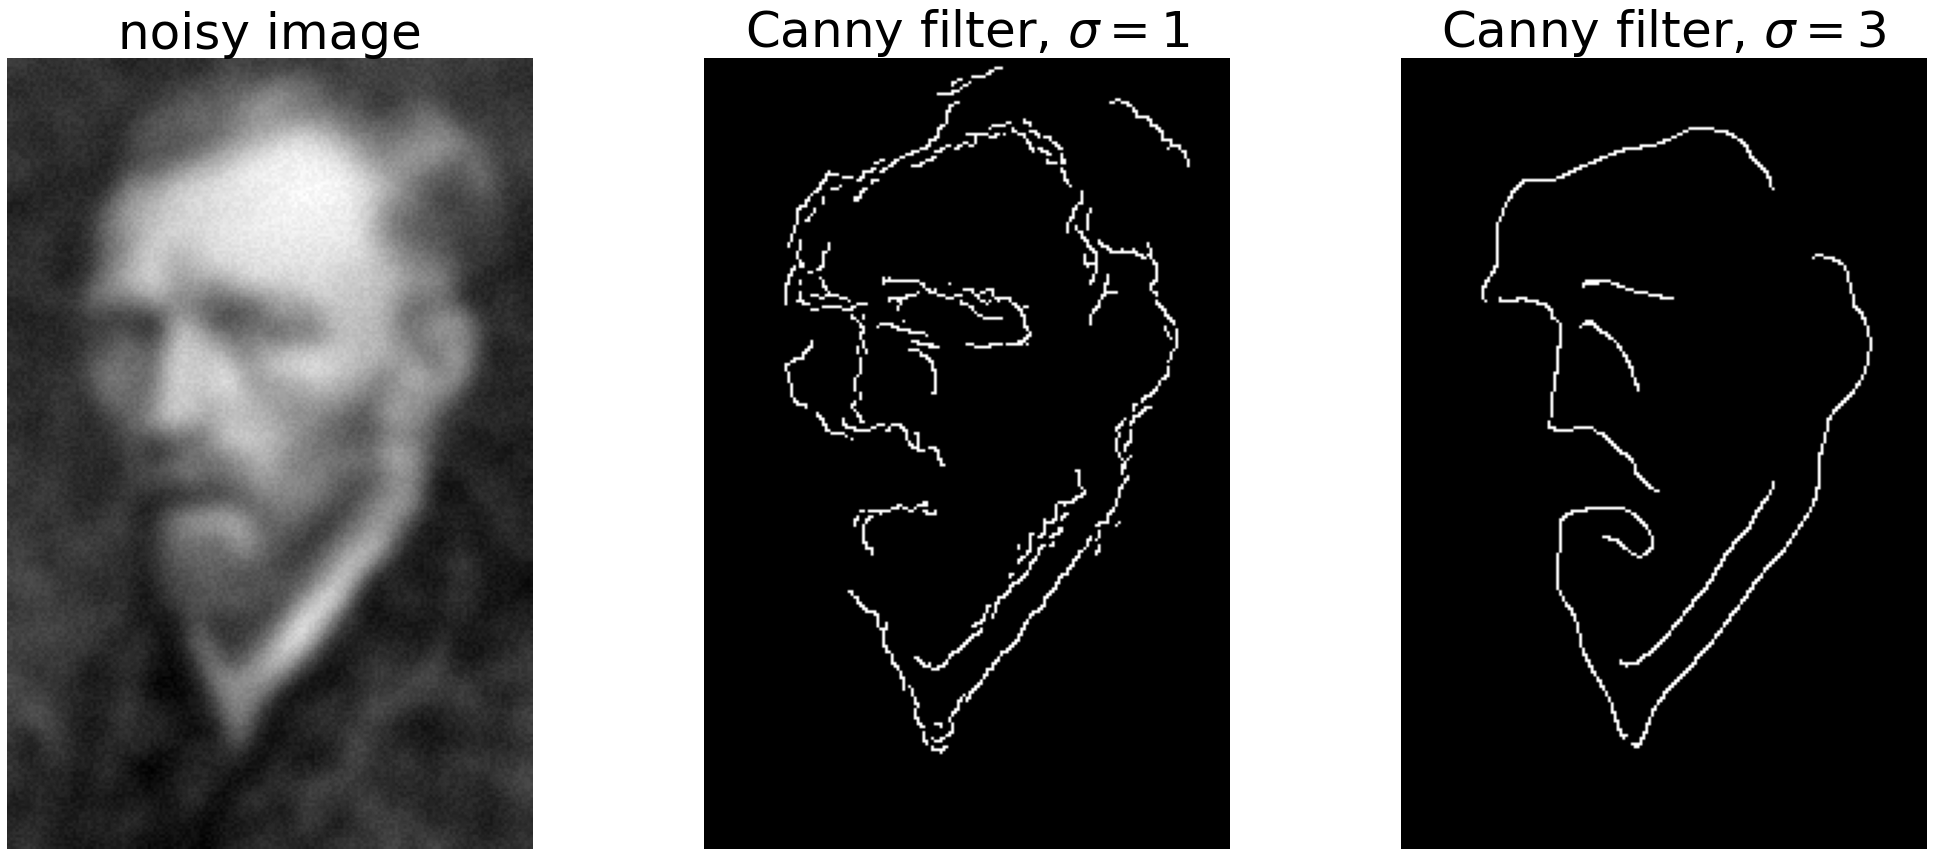

In [12]:
Canny(gambar='ekspresionisme.jpg')

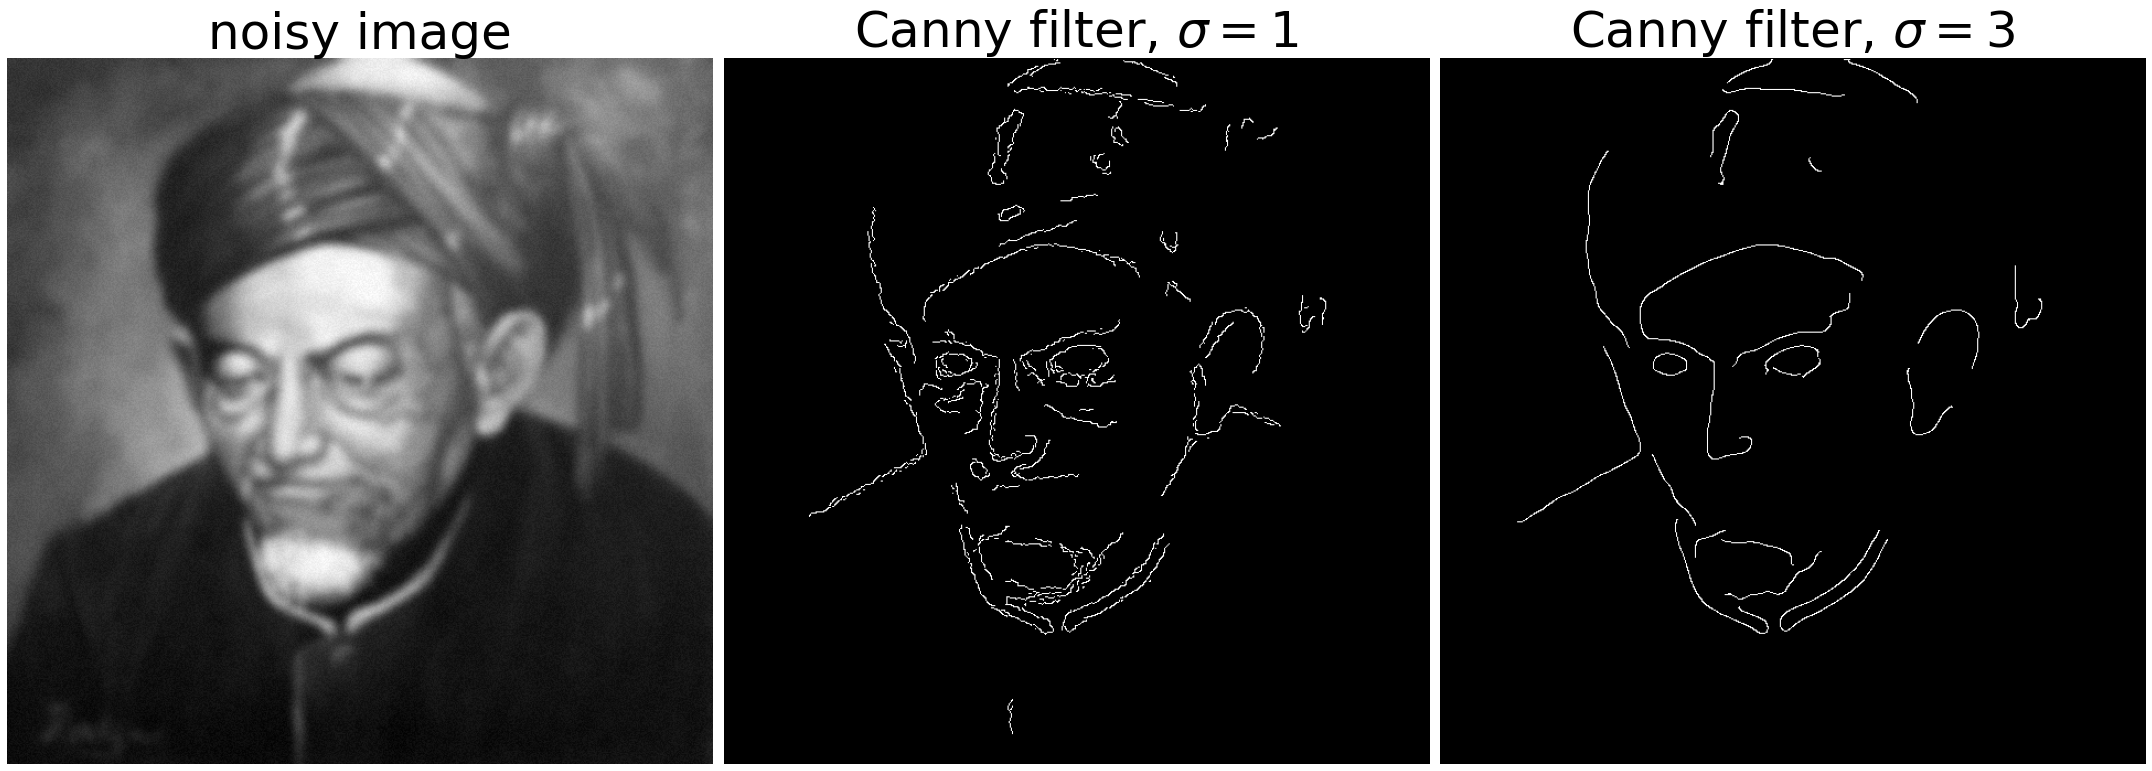

In [13]:
Canny(gambar='realisme.jpg')

### Entropi

In [14]:
from skimage.morphology import disk
from skimage.filters.rank import entropy

In [15]:
def Entropy(gambar):
    image = rgb2gray(imread(gambar))
    fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(18, 10), sharex=True,sharey=True)
    fig.colorbar(axes1.imshow(image, cmap=pylab.cm.gray), ax=axes1)
    axes1.axis('off'), axes1.set_title('Image', size=20),axes1.set_adjustable('box')
    fig.colorbar(axes2.imshow(entropy(image, disk(5)), cmap=pylab.cm.inferno),ax=axes2)
    axes2.axis('off'), axes2.set_title('Entropy', size=20),axes2.set_adjustable('box')
    pylab.show()

C:\Users\User\AppData\Local\Temp/ipykernel_4384/1787538202.py:1: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  Entropy(gambar='ekspresionisme.jpg')


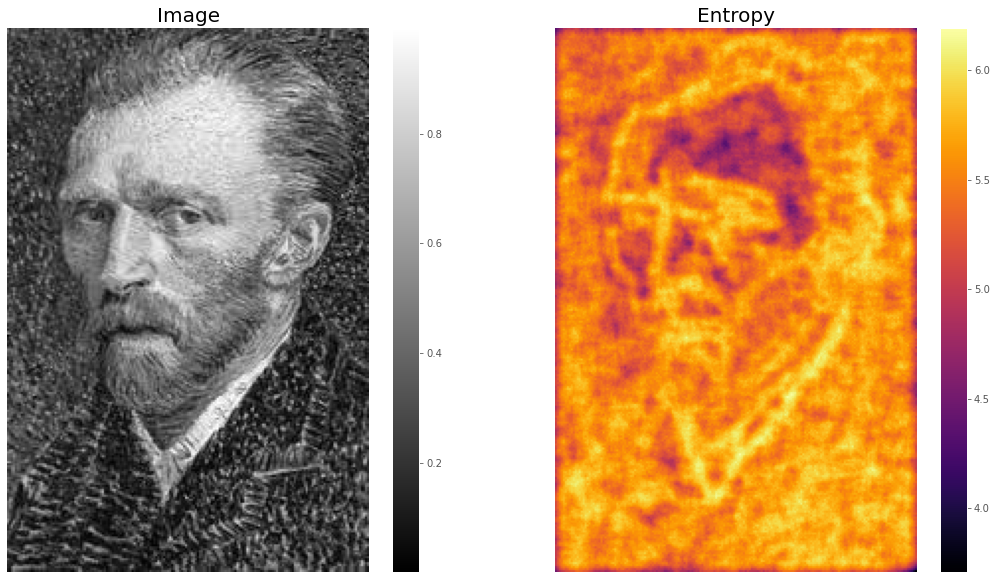

C:\Users\User\AppData\Local\Temp/ipykernel_4384/1787538202.py:2: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  Entropy(gambar='realisme.jpg')


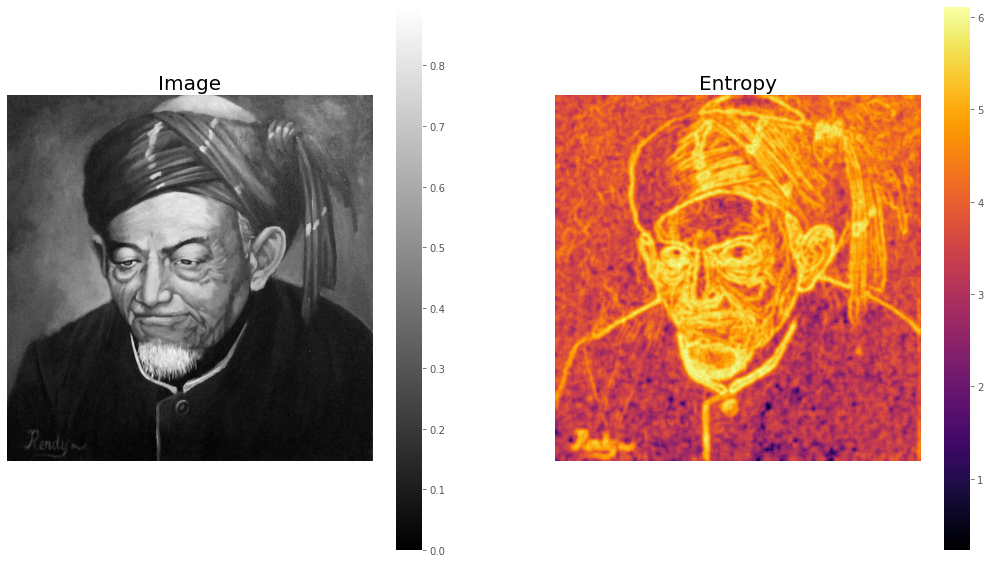

In [16]:
Entropy(gambar='ekspresionisme.jpg')
Entropy(gambar='realisme.jpg')